Week 3 – Day 1: kNN (Classification & Regression)
🎯 Objective of the day

Understand how kNN works (instance-based learning).

Train it for classification and regression.

Compare performance with previous models.

📝 Notes

kNN is a lazy learner: no training phase, it just stores the data.

Predictions come from the majority (classification) or average (regression) of the k nearest points.

Small k → flexible but noisy (overfit).

Large k → smooth but may underfit.

Accuracy: 0.8222222222222222


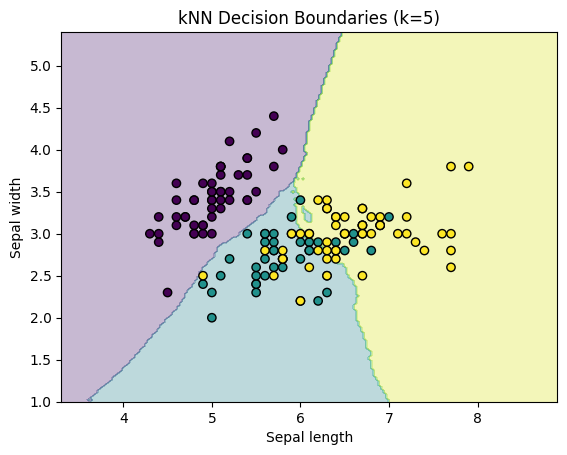

R²: 0.4496443363052316
RMSE: 0.8492296526448859


In [ ]:
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Classification with kNN (iris)

iris = load_iris()
X = iris.data[:, :2]   # sepal length & width (2D for plotting)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot decision boundary

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="viridis")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("kNN Decision Boundaries (k=5)")
plt.show()

# Regression with kNN (California Housing)

housing = fetch_california_housing(as_frame=True)
X = housing.data[["MedInc", "AveRooms"]]   # just 2 features for speed
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

y_pred = knn_reg.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))


📊 Exercise of the Day

1) For Iris classification:

What accuracy did you get with k=5?

How does the decision boundary look compared to logistic regression or trees?

2) For California Housing regression:

Report R² and RMSE.

How does kNN regression compare to Linear Regression (~0.46 R²) and Gradient Boosting (~0.80 R²)?

1) 
- I got 0.8 accuracy. 
- The decision boundary looks messier, much more flexible.

2) 
kNN
R²: 0.4496443363052316
RMSE: 0.8492296526448859

Gradient Boosting:
R²: 0.8004451261281281
MSE: 0.26149849837343114

Linear Regression:
MSE: 0.7091157771765548
R²: 0.45885918903846656

kNN is far worst at predicting house prices however it does have good accuracy predicting flowers.



🌟 Mini-Challenge

Try different values of k: 1, 5, 20.

Plot accuracy (classification) or R² (regression) vs k.
👉 What happens as k increases? Why?

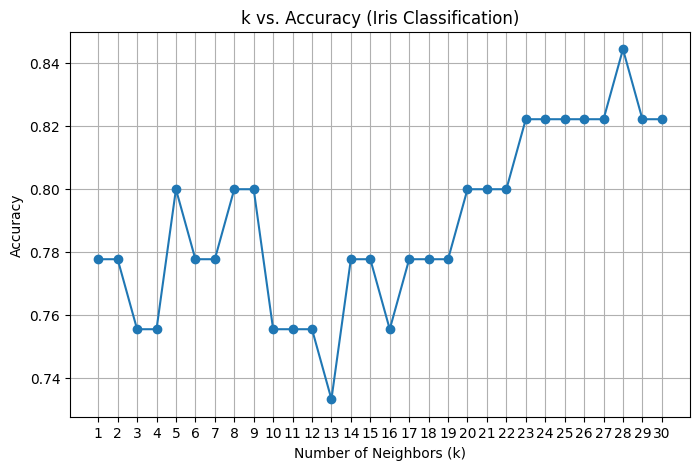

In [11]:
iris = load_iris()
X = iris.data[:, :2]   # sepal length & width (2D for plotting)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# k vs. accuracy
k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("k vs. Accuracy (Iris Classification)")
plt.xticks(k_values)
plt.grid(True)
plt.show()


Very small k (1–3): model memorizes training points → can overfit. Accuracy ~0.75–0.8.

Medium k (5–15): accuracy fluctuates around ~0.75–0.8.

Larger k (20+): accuracy stabilizes and actually improves (~0.82–0.85). That makes sense: with more neighbors, predictions are smoother and less noisy.

✨ Key Insight

kNN is non-parametric: no training, just memory of data.

Works well on small, structured datasets, but scales poorly (slow + bad generalization on noisy, high-dimensional data).

The trade-off between small k (flexibility) vs large k (stability) ties back to the bias-variance tradeoff you started seeing in Week 2.